In [73]:
import datetime
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
import h5py
from matplotlib import pyplot as plt
import cv2
import pandas as pd

# filename
File = 'AEQ31_edi_20181002_046_160444'


with h5py.File(f'C:/TDK/adatok/{File}.h5', 'r') as hdf:
    roip = hdf.get('ROIP')
    roip1 = roip.get('ROIP1')
    roip1_data = roip1.get('ROIP1Data')
    
    frames = []
    List = []
    List2 = []
    
    for i in range(roip1_data.shape[2]):
        
        image = np.array(roip1_data[100:230, 475:560, i])
        
        # using median filter
        blur = cv2.medianBlur(image, 3)
        
        # binarization
        thresh = cv2.threshold(blur, 2300, 4095, cv2.THRESH_BINARY)[1]
        
        # counting the nonzero pixel values in the image
        nzCount = cv2.countNonZero(thresh)
        
        # adding number of nonzero pixels to predifined list
        frames.append(nzCount)
        
        # adding the number of the frames and binary value of hotspot to
        if nzCount == 0:
            List.append('no')
            List2.append(0)
        else:
            List.append('yes')
            List2.append(1)

# create pdf with plot and table
with PdfPages(f'{File}_pdf.pdf') as pdf:
    plt.figure(figsize=(8.27, 11.69), dpi=100)
    plt.subplot(2, 1, 1)
    plt.plot(frames)
    plt.title(f'{File}', size=12)
    plt.xlabel('Frames', size=12)
    plt.ylabel('Number of nonzero pixels', size=12)
    

    plt.subplot(2, 1, 2)
    plt.plot(List2)
    plt.title(f'{File} binary', size=12)
    plt.xlabel('Frames', size=12)
    plt.ylabel('Hotspot', size=12)
    plt.tight_layout()
    pdf.savefig()
    plt.close()

# save binary hotspot yes/no to .csv 
df = pd.DataFrame(List, columns=['Hotspot?'])
df.to_csv(f'{File}_csv.csv')

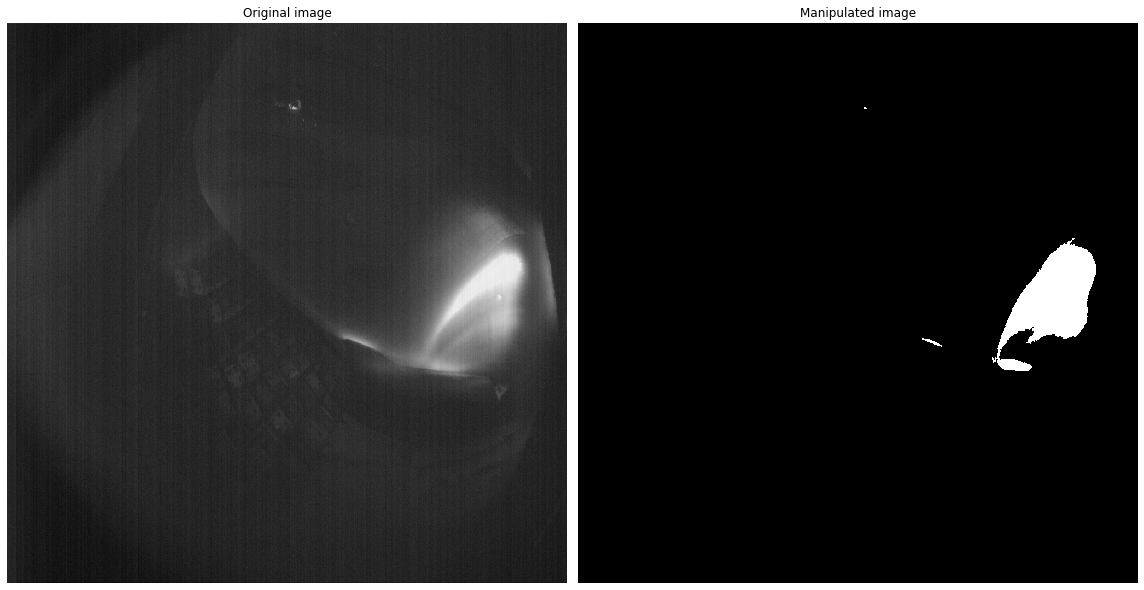

In [89]:
'''
This cell is only for visualizing purposes
'''

with h5py.File(f'C:/TDK/adatok/{File}.h5', 'r') as hdf:
    roip = hdf.get('ROIP')
    roip1 = roip.get('ROIP1')
    roip1_data = roip1.get('ROIP1Data')
        
    image0 = np.array(roip1_data[:1280, :1024, 35])
    image = image0
        
    # using median filter
    blur = cv2.medianBlur(image, 3)
        
    # binarization
    thresh = cv2.threshold(blur, 2300, 4095, cv2.THRESH_BINARY)[1]
        
    # plotting the original and the manipulated image
    plt.figure(figsize=(16,16))
    plt.subplot(1, 2, 1)
    plt.imshow(image0, vmin=0, vmax=4095, cmap='gray')
    plt.title('Original image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(thresh, vmin=0, vmax=4095, cmap='gray')
    plt.title('Manipulated image')
    plt.axis('off')
    
    plt.tight_layout()